In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [8]:
# Read in the data
data_path = '../../preprocessing/data'

obs_B = pd.read_parquet(f'{data_path}/obs_B.parquet')
est_B = pd.read_parquet(f'{data_path}/est_B.parquet')



test_B = pd.read_parquet(f'{data_path}/test_B.parquet').dropna()


# Concatenate
B = pd.concat([obs_B, est_B])
B.head()


,pv_measurement,date_forecast,dew_point_2m:K,t_1000hPa:K,clear_sky_rad:W,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,total_cloud_cover:p,month,year,time_of_day,dew_point_2m:K_rate_of_change,t_1000hPa:K_rate_of_change,clear_sky_rad:W_rate_of_change,diffuse_rad:W_rate_of_change,direct_rad:W_rate_of_change,effective_cloud_cover:p_rate_of_change,total_cloud_cover:p_rate_of_change
0,0.0,2019-01-01 00:00:00,275.149994,278.250000,0.0,0.0,0.0,81.824997,86.324997,1,2019,0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,2019-01-01 01:00:00,274.825012,278.075012,0.0,0.0,0.0,97.474998,99.074997,1,2019,60,-0.324982,-0.174988,0.0,0.0,0.0,15.650002,12.750000
2,0.0,2019-01-01 02:00:00,274.799988,278.049988,0.0,0.0,0.0,96.425003,97.925003,1,2019,120,-0.025024,-0.025024,0.0,0.0,0.0,-1.049995,-1.149994
3,0.0,2019-01-01 03:00:00,274.674988,277.600006,0.0,0.0,0.0,96.775002,97.224998,1,2019,180,-0.125000,-0.449982,0.0,0.0,0.0,0.349998,-0.700005
4,0.0,2019-01-01 04:00:00,275.500000,277.649994,0.0,0.0,0.0,96.724998,96.824997,1,2019,240,0.825012,0.049988,0.0,0.0,0.0,-0.050003,-0.400002


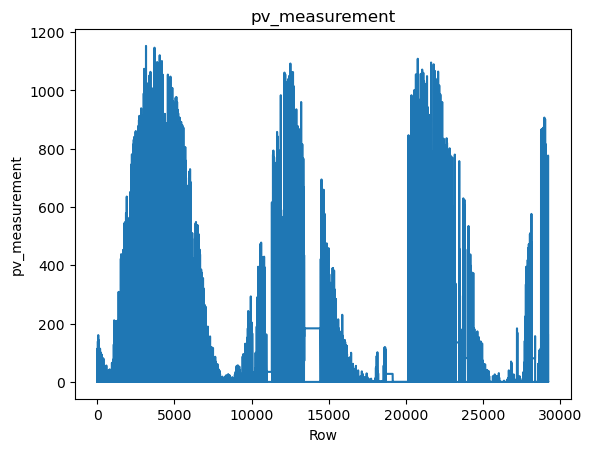

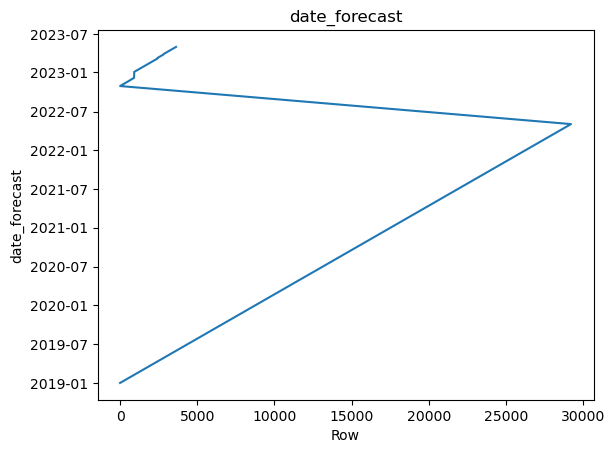

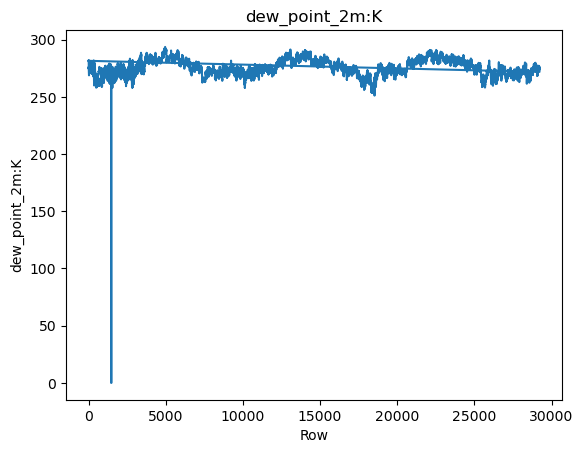

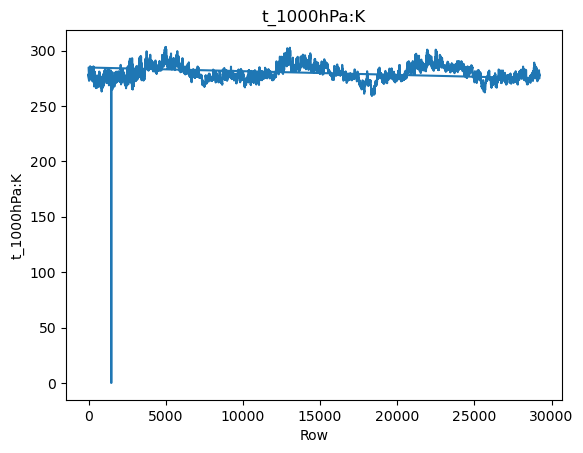

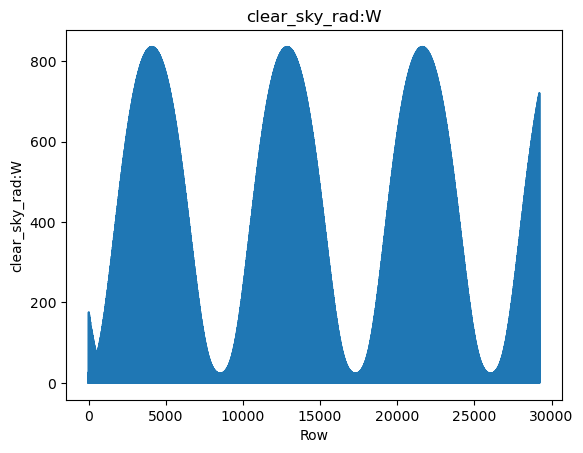

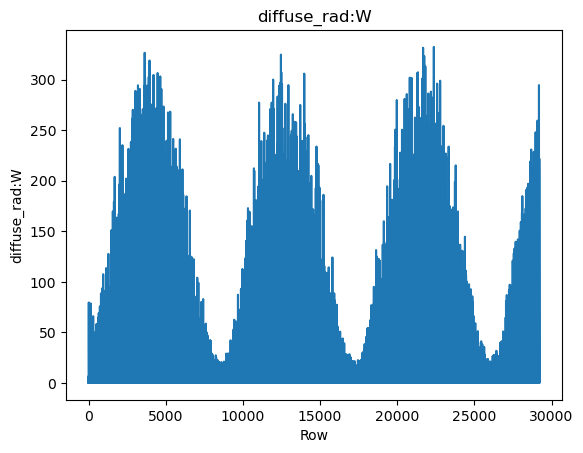

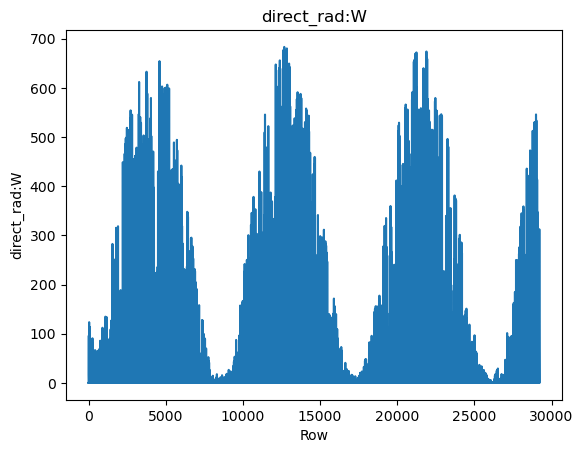

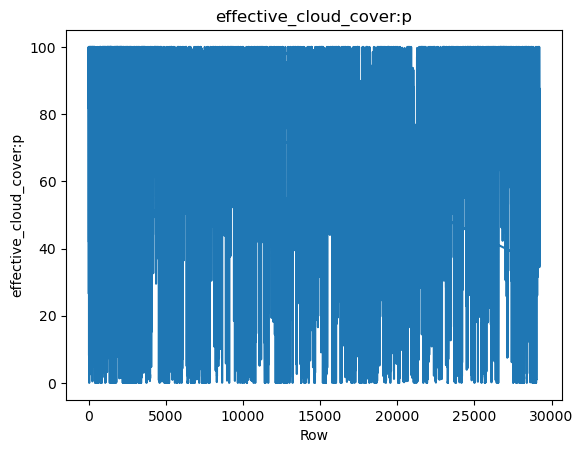

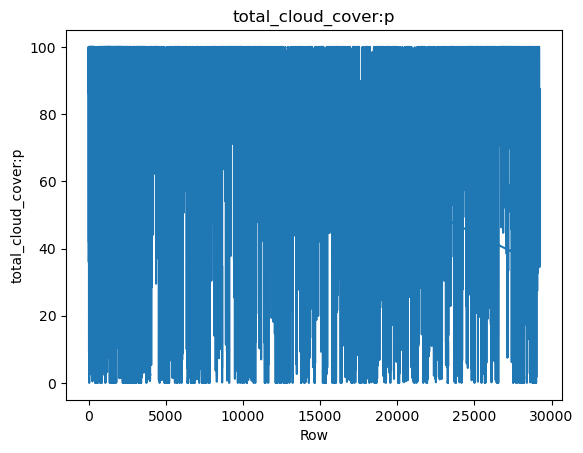

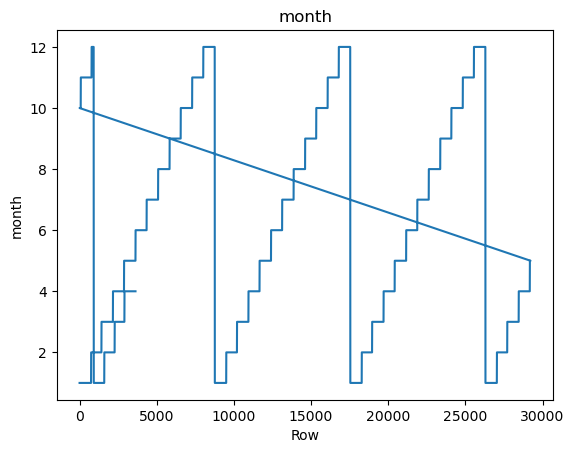

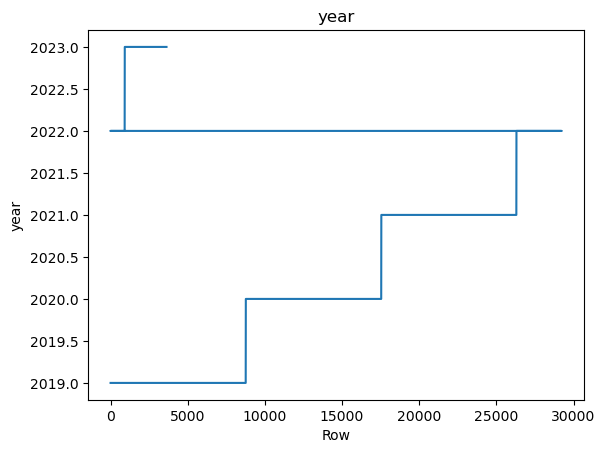

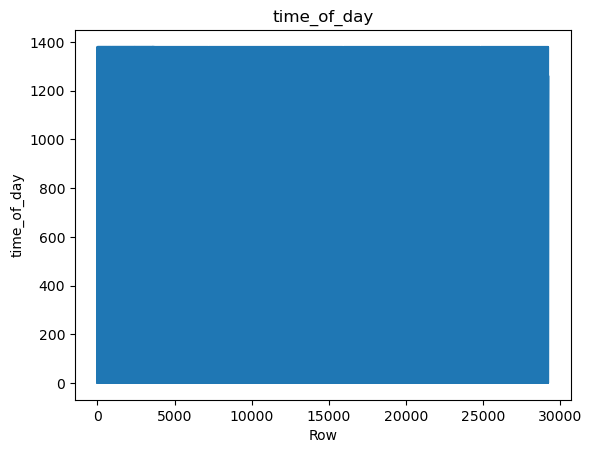

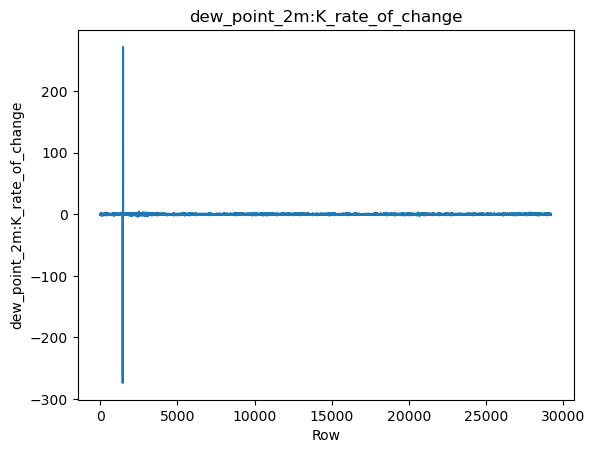

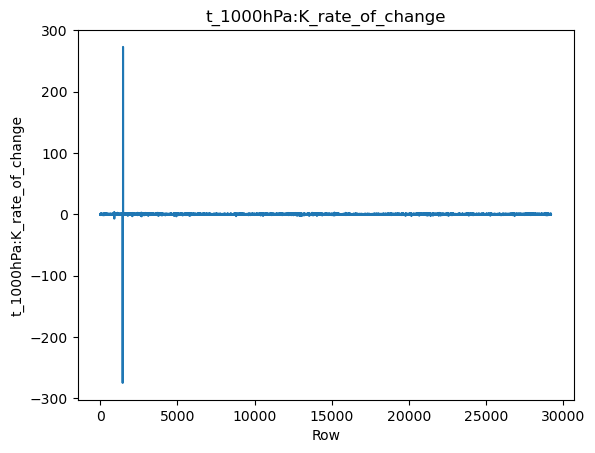

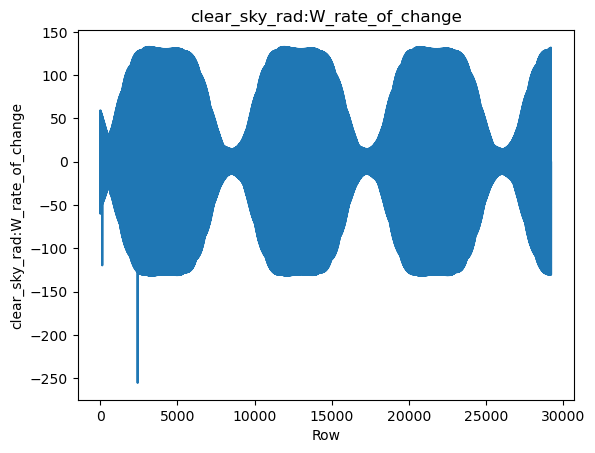

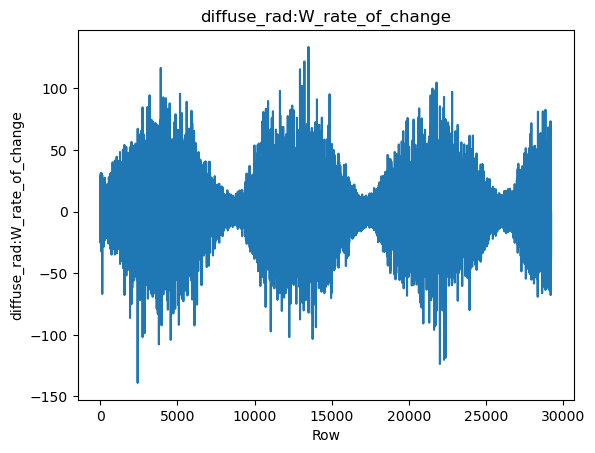

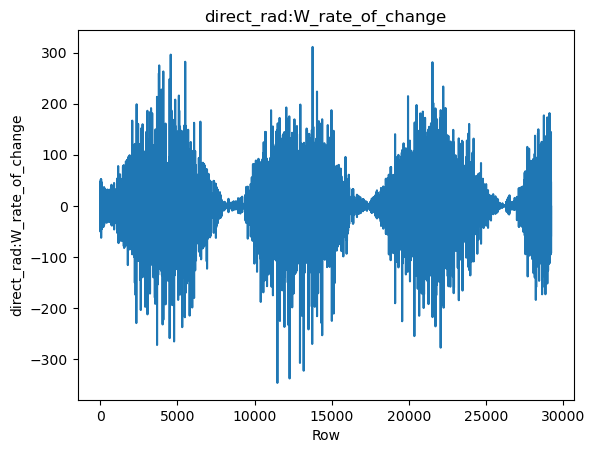

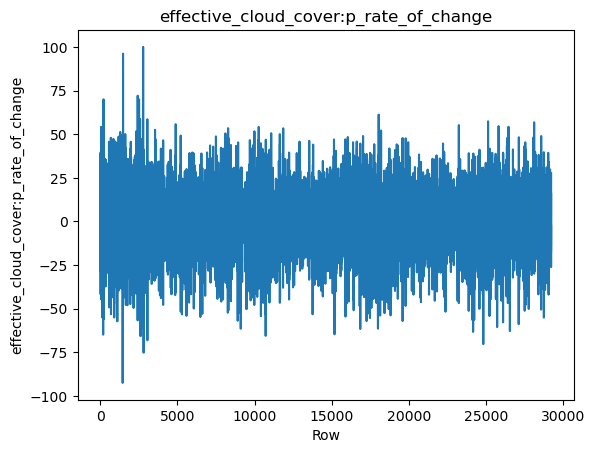

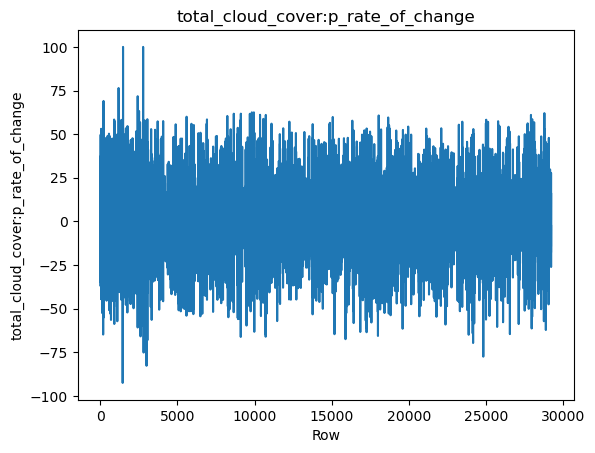

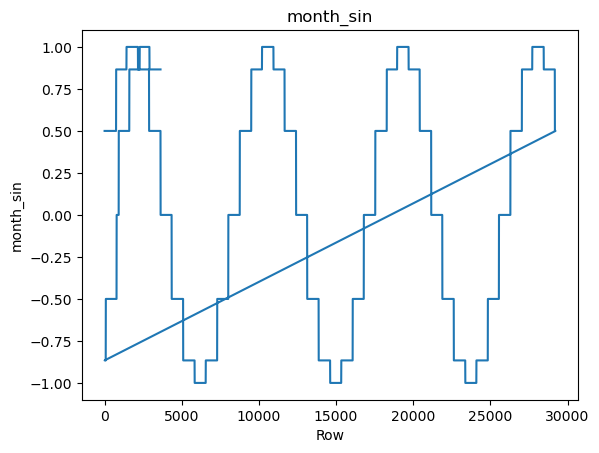

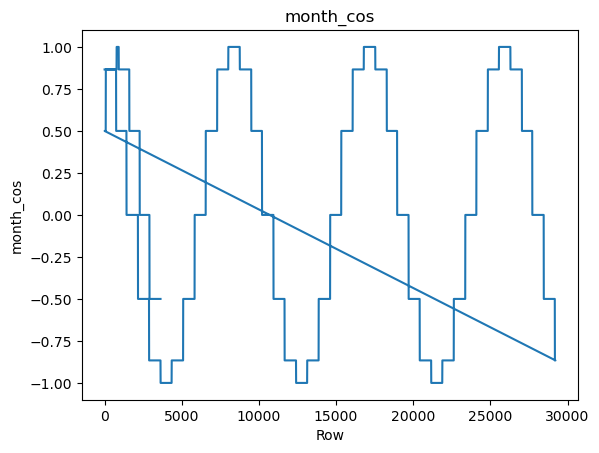

In [9]:
B['month_sin'] = np.sin(2 * np.pi * B['month'] / 12)
B['month_cos'] = np.cos(2 * np.pi * B['month'] / 12)


for col in B.columns:
    plt.figure()
    plt.plot(B.index, B[col])
    plt.title(col)
    plt.xlabel('Row')
    plt.ylabel(col)
    plt.show()

In [10]:
X_B = B.drop(columns=['pv_measurement'])
y_B = B['pv_measurement']

scaler = StandardScaler()

X_B_scaled = scaler.fit_transform(X_B)

lasso_B = LassoCV(cv=5).fit(X_B_scaled, y_B)

selected_features_B = X_B.columns[lasso_B.coef_ != 0]

print("Selected features for B:", selected_features_B)



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
rf_B = RandomForestRegressor().fit(X_B, y_B)
importance_B = rf_B.feature_importances_
sorted_idx_B = importance_B.argsort()[::-1]

print("\nFeatures sorted by importance for B:")
for idx in sorted_idx_B[:10]:  # Only consider the top 10 features
    print(X_B.columns[idx], importance_B[idx])


Features sorted by importance for B:
clear_sky_rad:W 0.6388154692803675
direct_rad:W 0.16791943310951873
absolute_humidity_2m:gm3 0.03748388306095032
year 0.03498729221774846
diffuse_rad:W 0.02728372168627606
wind_speed_u_10m:ms 0.023765620585846504
wind_speed_10m:ms 0.01927896156737582
time_of_day 0.01425261457331592
month 0.01254655742359542
month_sin 0.010435474922619566
